In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

import networkx as nx
import matplotlib.pyplot as plt
import pylab

import random

from data_utils import load_dataset, prepare_task, get_students, get_task_number, get_task_name, get_distances, \
                        levenshtein
    
from graph_utils import create_graph, create_cluster_graph

from KMeans import KMeans

from graph_utils import create_graph, create_cluster_graph

from ast_utils import program_to_tree, print_tree, get_ast_distances

ModuleNotFoundError: No module named 'data_utils'

In [ ]:
def prog_list_with_correct(prog_list, sorted_task):
    """
    Takes a list of programs and returns list of tuples (program, bool),
    where bool value indicates whether the program is correct or not
    """
    new_prog_list = []
    for prog in prog_list:
        # takes first row and returns boolean value
        correct = sorted_task.loc[sorted_task['program']==prog]['correct'].any()
        new_prog_list.append((prog, correct))
        
    return new_prog_list

In [ ]:
data_folder = 'data/'
task_number = 23

In [ ]:
data = load_dataset(data_folder)
snapshots = data['program_snapshots']
tasks = data['task_sessions']
sorted_task = prepare_task(task_number, snapshots, tasks, execution_only=False)
students = get_students(sorted_task)

In [12]:
rows = len(sorted_task.index)
programs = dict(sorted_task['program'].value_counts() / rows)
programs = {k: v*100 for k, v in programs.items()}
limit = 0.05
print(len(programs))
print(len({k : v for k, v in programs.items() if v > limit}))
# print({k : v for k, v in programs.items() if v > limit})

858
328


In [14]:
graph = create_graph(students, sorted_task)

NameError: name 'students' is not defined

In [5]:


prog_list = list(programs.keys())
prog_list = prog_list_with_correct(prog_list, sorted_task)
false_prog_list = list(map(lambda x: x[0], filter(lambda x: not x[1], prog_list)))
correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))

dists = get_distances(false_prog_list, levenshtein)

NameError: name 'programs' is not defined

In [10]:


kmeans = KMeans()
min_centroids, min_dist = kmeans.fit(8, 10, false_prog_list)

NameError: name 'false_prog_list' is not defined

In [10]:
prog_len = len(false_prog_list)
cluster_ids = kmeans.assign_clusters(min_centroids, false_prog_list, dists)
cluster_dict = {}
for i in range(8):
    cur_progs = [false_prog_list[j] for j in range(prog_len) if min_centroids[i] == cluster_ids[j]]
    cluster_dict[min_centroids[i]] = cur_progs
#     print(min_centroids[i], cur_progs)

In [11]:
graph = create_graph(students, sorted_task)
correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))
new_graph = create_cluster_graph(graph, cluster_dict, correct_prog_list)

threshold = 0.01
suma = sum(new_graph.values())
print(suma)
new_graph = {k: v for k, v in new_graph.items() if v/suma > threshold or k[0]=='start'}

srs
srs
srs
sR2{}
srs
srs
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
srR2{}R4{}
srR2{}R4{}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{s}R2{}
R2{s}R2{}
sR2{}
sR2{}
sR2{}
sR2{}
R2{sr}
R2{sr}
srs
srs
sR2{}
sR2{}
srs
srR2{}R4{}
R2{sr}
R2{s}R2{}
srs
sR2{}
sR2{}
sR2{}
sR2{}
sR2{}
srs
srs
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
sR2{}
sR2{}
sR2{}
sR2{}
srs
sR2{}
sR2{}
sR2{}
R2{sr}
R2{sr}
sR2{}
sR2{}
R2{s}R2{}
R2{s}R2{}
sR2{}
R2{sr}
R2{sr}
R2{sr}
srs
R2{sr}
srs
srs
sR2{}
sR2{}
srs
R2{sr}
R2{sr}
srs
srs
srs
srs
srs
srs
sR2{}
R2{sr}
R2{sr}
sR2{}
R2{sr}
srs
sR2{}
sR2{}
R2{sr}
srs
srs
srs
sR2{}
srs
srs
sR2{}
R2{sr}
R2{sr}
R2{sr}
srs
sR2{}
sR2{}
R2{sr}
sR2{}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sR2{r}}
srs
sR2{}
R2{sr}
R2{sr}
sR2{}
R2{sr}
sR2{}
sR2{}
R2{sr}
R2{sr}
R2{sR2{r}}
R2{sR2{r}}
sR2{}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
sR2{}
sR2{}
R2{s}R2{}
R2{s}R2{}
sR2{}
R2{sr}
srs
sR2{}
R2{sr}
R2{sr}
R2{sr}
R2{sr}
srs
srs
sR2{}
R2{sr}
R2{sr}
R2{sr}
sR2{}
sR2{}
sR2{}
R2{sr}
R2{s}R2{

In [12]:
new_graph

{('', 'correct'): 108,
 ('R2{sr}', 'R2{sr}'): 494,
 ('R2{sr}', 'correct'): 102,
 ('R2{sr}', 'sR2{}'): 50,
 ('R2{s}R2{}', 'R2{s}R2{}'): 39,
 ('correct', 'end'): 106,
 ('sR2{}', 'R2{sr}'): 123,
 ('sR2{}', 'sR2{}'): 226,
 ('sR2{}', 'srs'): 55,
 ('srs', 'R2{sr}'): 33,
 ('srs', 'sR2{}'): 88,
 ('srs', 'srs'): 313,
 ('start', 'R2{sr}'): 5,
 ('start', 'correct'): 3,
 ('start', 'sR2{}'): 50,
 ('start', 'srs'): 62}

In [3]:
import pygraphviz as pgv

def create_draw_pygraphviz(graph, filename):
    nodes = set()
    for key in graph.keys():
        nodes.add(key[0])
        nodes.add(key[1])
        
    G = pgv.AGraph(strict=False,directed=True)
    for val in list(nodes):
        G.add_node(val)

    for key, val in graph.items():
        G.add_edge(key[0], key[1], weight=val, label=val)
        
    G.node_attr['shape'] = 'circle'
    G.layout('dot')
    G.draw(filename)

ModuleNotFoundError: No module named 'pygraphviz'

In [7]:
def graph_sum(graph):
    return sum(graph.values())


In [5]:
graph_sum({'1' : 2, 'a' : 5})

7

In [8]:
data_folder = 'data/'
data = load_dataset(data_folder)
snapshots = data['program_snapshots']
tasks = data['task_sessions']

def solve_task(task_number, cluster_number, fitting_tries, dist='levenshtein'):
    sorted_task = prepare_task(task_number, snapshots, tasks, execution_only=False)
    students = get_students(sorted_task)
    
    rows = len(sorted_task.index)
    programs = dict(sorted_task['program'].value_counts() / rows)
    programs = {k: int(round(v, 2)*100) for k, v in programs.items()}
    
    ### ADDING MINIMAL PERCENT LIMIT
    limit = 0.05
#     programs = {k : v for k, v in programs.items() if v > limit}

    prog_list = list(programs.keys())
    prog_list = prog_list_with_correct(prog_list, sorted_task)
    false_prog_list = list(map(lambda x: x[0], filter(lambda x: not x[1], prog_list)))
    correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))

    if dist == 'levenshtein':
        dists = get_distances(false_prog_list, levenshtein)
    elif dist == 'ast':
        dists = get_ast_distances(false_prog_list)
    else:
        print("Invalid distance function")
        return
    kmeans = KMeans()
    min_centroids, min_dist = kmeans.fit(cluster_number, fitting_tries, false_prog_list)
    
    prog_len = len(false_prog_list)
    cluster_ids = kmeans.assign_clusters(min_centroids, false_prog_list, dists)
    cluster_dict = {}
    for i in range(cluster_number):
        cur_progs = [false_prog_list[j] for j in range(prog_len) if min_centroids[i] == cluster_ids[j]]
        cluster_dict[min_centroids[i]] = cur_progs
    #     print(min_centroids[i], cur_progs)
    
    graph = create_graph(students, sorted_task)
    g_sum = graph_sum(graph)
    correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))
    new_graph = create_cluster_graph(graph, cluster_dict, correct_prog_list)
    
    gnew_sum = graph_sum(new_graph)
    print(g_sum, ' -- vs. --', gnew_sum)
    threshold = 0.01
    suma = sum(new_graph.values())
#     print(suma)
    
#     reduced_graph = {k: v for k, v in new_graph.items() if v/suma > threshold or k[0]=='start'}
    reduced_graph = new_graph
    print(new_graph)
#     create_draw_pygraphviz(reduced_graph, 'graphs/task_' + str(task_number) + '_clusters_' + \
#                            str(cluster_number) + '_' + dist + '.png')
    
    return new_graph, cluster_dict

In [9]:
task_n = 5
clusters = 12
levi_graph, levi_dict = solve_task(task_n, clusters, 1000, dist='levenshtein')
ast_graph, ast_dict = solve_task(task_n, clusters, 1000, dist='ast')

/home/morpheus/repos/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


968  -- vs. -- 968
{('start', 'fIy{}'): 32, ('fIy{}', 'R2{rf}'): 12, ('R2{rf}', 'I!y{r}'): 7, ('I!y{r}', 'I!y{r}'): 96, ('I!y{r}', 'W!y{f}Iy{r}'): 18, ('W!y{f}Iy{r}', 'W!y{f}Iy{r}'): 77, ('W!y{f}Iy{r}', 'R2{rf}'): 5, ('R2{rf}', 'W!y{f}Iy{r}'): 5, ('W!y{f}Iy{r}', 'R2{fIy{r}}'): 3, ('R2{fIy{r}}', 'W!y{f}Iy{r}'): 1, ('W!y{f}Iy{r}', 'I!y{r}'): 15, ('I!y{r}', 'correct'): 3, ('correct', 'correct'): 23, ('correct', 'end'): 22, ('fIy{}', 'I!y{r}'): 44, ('I!y{r}', 'Iy{f}R2{}'): 17, ('Iy{f}R2{}', 'Iy{f}R2{}'): 28, ('Iy{f}R2{}', 'I!y{r}'): 11, ('I!y{r}', 'end'): 1, ('I!y{r}', 'W!b{fIy{}}'): 6, ('W!b{fIy{}}', 'W!b{fIy{}}'): 43, ('W!b{fIy{}}', 'I!b{W!y{rl}}'): 2, ('I!b{W!y{rl}}', 'I!y{r}'): 3, ('start', 'I!y{r}'): 3, ('I!y{r}', 'R2{rf}'): 7, ('R2{rf}', 'R2{rf}'): 54, ('R2{rf}', 'end'): 3, ('I!y{r}', 'fIy{}'): 20, ('fIy{}', 'fIy{}'): 72, ('R2{rf}', 'fIy{}'): 10, ('R2{rf}', 'Iy{f}R2{}'): 3, ('Iy{f}R2{}', 'R2{rf}'): 2, ('Iy{f}R2{}', 'W!y{f}Iy{r}'): 5, ('W!y{f}Iy{r}', 'end'): 4, ('I!y{r}', 'I!b{R2{rl}}

In [10]:
levi_dict

{'I!b{R2{rl}}': ['fW!y{R2{rl}}',
  'W!y{R2{f}}',
  'rW!y{R2{rl}}',
  'I!b{R2{rfl}}',
  'I!b{R2{rf}}',
  'I!b{R2{rl}}',
  'I!y{R2{rl}f}',
  'I!b{R2{frl}}',
  'fW!b{R2{rl}}',
  'I!b{R2{rlf}}',
  'I!b{R2{r}}',
  'W!y{R2{}}',
  'fW{R2{rl}}',
  'I!b{R2{f}}',
  'I!b{R2{}}',
  'W!y{R2{rl}}f',
  'I!b{R2{rf}}I{}',
  'W!y{R2{rl}}',
  'I!b{}R2{rf}',
  'I!b{R2{fr}}'],
 'I!b{W!y{flr}}': ['I!b{W!y{flr}}'],
 'I!b{W!y{rl}}': ['W!b{Iy{rl}f}',
  'W!b{Iy{rl}}',
  'R10{I!y{frl}}',
  'W!b{Iy{rl}}f',
  'Wb{Iy{rl}f}',
  'I!b{Wk{frl}}',
  'I!b{W!y{rfl}}',
  'W!b{fI!y{rl}}',
  'I!b{W!y{frl}}',
  'I!b{W!b{}}',
  'R10{I!b{frl}}',
  'I!b{W!y{}}',
  'W!b{I!y{rl}f}',
  'I!b{Wy{frl}}',
  'I!b{W!y{r}}',
  'I!b{W!k{frl}}',
  'I!b{W!b{frl}}',
  'I!b{W!r{frl}}',
  'W!b{I!y{rl}}',
  'I!b{W!y{rl}}',
  'I!b{W!y{fl}}'],
 'I!y{r}': ['I!b{}',
  'W!y{f}',
  'W!b{}',
  'W!b{f}',
  'Iy{r}',
  'I!y{f}',
  'W!y{}',
  'I!y{}',
  'fI!y{r}l',
  'fI!y{r}',
  'I!y{r}',
  'Iy{rl}',
  'fI!y{rl}',
  'Ik{f}',
  'I{f}',
  'r',
  'Wy{fr}',
 

In [11]:
ast_dict

{'I!b{R2{rl}}': ['I!b{Wk{frl}}',
  'fW!y{R2{rl}}',
  'I!b{W!y{rfl}}',
  'I!b{W!y{frl}}',
  'R10{I!b{frl}}',
  'rW!y{R2{rl}}',
  'I!b{R2{rfl}}',
  'I!b{Wy{frl}}',
  'I!b{R2{rf}}',
  'I!b{R2{rl}}',
  'I!b{W!k{frl}}',
  'I!b{W!b{frl}}',
  'I!y{R2{rl}f}',
  'I!b{W!r{frl}}',
  'I!b{R2{frl}}',
  'fW!b{R2{rl}}',
  'I!b{R2{rlf}}',
  'I!b{R2{r}}',
  'I!b{W!y{rl}}',
  'I!b{W!y{flr}}',
  'I!b{R2{f}}',
  'W!y{R2{rl}}f',
  'I!b{R2{rf}}I{}',
  'W!y{R2{rl}}',
  'I!b{W!y{fl}}',
  'I!b{R2{fr}}'],
 'I!y{r}': ['I{}',
  'I!b{}',
  'Iy{r}',
  'I!y{f}',
  'Iy{}',
  'I!y{}',
  'fI!y{r}l',
  'fI!y{r}',
  'I!y{r}',
  'Ib{}',
  'Iy{rl}',
  'fI!y{rl}',
  'Ik{f}',
  'I{f}',
  'r',
  'W!b{Ib{}}',
  'R10{I!y{frl}}',
  'W!b{I!b{}}',
  'Wb{Iy{rl}f}',
  'W!b{I{}}',
  'W!y{R2{f}}',
  'fI!y{rl}f',
  'R2{rf}',
  'Ir{rl}',
  'W!b{f}I!y{rl}',
  'I!b{W!b{}}',
  'I!y{rl}',
  'I!y{frl}',
  'I!y{fr}',
  'R2{I!y{frl}}',
  'I!b{W!y{}}',
  'W!b{I!y{rl}f}',
  'W!y{s}',
  'W!y{Iy{r}f}',
  'R2{r}',
  'I!r{}',
  'Wy{fr}I!y{l}',
  'I!

In [ ]:
for i in range(1, 86):
    print('Solving task:', i)
    solve_task(i, 8, 1000, dist='ast')

Solving task: 1


/home/morpheus/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


Totally we have 244 programs


In [27]:
sorted_task = prepare_task(task_number, snapshots, tasks, execution_only=False)
students = get_students(sorted_task)

rows = len(sorted_task.index)
programs = dict(sorted_task['program'].value_counts() / rows)
programs = {v*100 for k, v in programs.items()}

/home/morpheus/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


In [28]:
programs

{0.016877637130801686,
 0.033755274261603373,
 0.050632911392405069,
 0.067510548523206745,
 0.084388185654008435,
 0.10126582278481014,
 0.1181434599156118,
 0.13502109704641349,
 0.15189873417721519,
 0.16877637130801687,
 0.18565400843881857,
 0.20253164556962028,
 0.21940928270042193,
 0.2362869198312236,
 0.25316455696202533,
 0.27004219409282698,
 0.28691983122362869,
 0.30379746835443039,
 0.32067510548523204,
 0.33755274261603374,
 0.35443037974683544,
 0.42194092827004215,
 0.43881856540084385,
 0.48945147679324891,
 0.55696202531645567,
 0.57383966244725737,
 0.59071729957805907,
 0.69198312236286919,
 0.70886075949367089,
 0.75949367088607589,
 0.81012658227848111,
 0.8438818565400843,
 0.89451476793248941,
 0.94514767932489441,
 0.99578059071729963,
 1.248945147679325,
 1.3839662447257384,
 1.4852320675105486,
 1.5021097046413503,
 1.5189873417721518,
 1.8396624472573837,
 1.9240506329113924,
 2.1265822784810129,
 2.312236286919831,
 2.6160337552742616,
 2.666666666666667,


In [12]:
def get_student(tasks, task_num, student_id):
    pass

def reverse_cluster_dict(cluster_dict):
    """
    Cluster dictionary has cluster centroid as key
    and values that belong to that cluster as list
    
    Returns dictionary, where key are programs that
    were values in origianal dictionary
    """
    
    rev_dict = {}
    
    for key, value in cluster_dict.items():
        for val in value:
            rev_dict[val] = key
            
        rev_dict[key] = key
            
    return rev_dict

In [13]:
# sorted_task = 
task = snapshots.loc[tasks['task'] == 23]
student_solution = task.loc[task['student'] == 584]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [28]:
student_solution

id  student  task solved                        start  \
20  22      584    23   True  2017-11-12T08:45:31.357977Z   

                            end  time_spent  
20  2017-11-12T08:46:59.764837Z          88

In [32]:
task_number = 23
sorted_task = prepare_task(task_number, snapshots, tasks, execution_only=False)

/home/morpheus/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


In [77]:
clusters = 8
ast_graph, ast_dict = solve_task(13, clusters, 1000, dist='ast')
rev_dict = reverse_cluster_dict(ast_dict)


/home/morpheus/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


Totally we have 324 programs
2521  -- vs. -- 2521
{('R2{}', 'fffff'): 1, ('R4{f}', 'R4{f}R2{l}'): 215, ('R4{f}R2{l}', 'R4{f}R2{l}'): 346, ('ff', 'ff'): 39, ('R2{fff}', 'R2{fff}'): 126, ('R4{f}', 'R2{fff}'): 15, ('fffff', 'end'): 1, ('fffff', 'R2{}'): 4, ('lffffl', 'fffff'): 1, ('R2{fff}', 'fffff'): 17, ('start', 'R2{}'): 107, ('ff', 'R4{f}R3{l}R2{}'): 1, ('R2{}', 'R4{f}R2{l}'): 6, ('R4{f}', 'correct'): 1, ('R4{f}R2{l}', 'fffff'): 3, ('R4{f}', 'R2{}'): 14, ('start', 'R4{f}'): 31, ('R4{f}R3{l}R2{}', 'R4{f}R2{l}'): 17, ('R2{fff}', 'R4{f}'): 11, ('R4{f}R3{l}R2{}', 'R4{f}'): 2, ('R4{f}', 'fffff'): 1, ('R4{f}R3{l}R2{}', 'fffff'): 1, ('fffff', 'R2{fff}'): 8, ('ff', 'R2{fff}'): 19, ('fffff', 'ff'): 7, ('R2{fff}', 'ff'): 6, ('R2{fff}', 'R4{f}R2{l}'): 3, ('fffff', 'fffff'): 51, ('R2{}', 'end'): 1, ('R4{f}R2{l}', 'R2{fff}'): 1, ('R4{f}', 'end'): 9, ('ff', 'R4{f}R2{l}'): 1, ('R2{fff}', 'end'): 2, ('R4{f}', 'ff'): 33, ('R4{f}R3{l}R2{}', 'correct'): 112, ('R4{f}R2{l}', 'R2{}'): 3, ('R2{}', 'R2{}'): 

In [78]:
def get_solution_legth(cluster_solution):
    solution_len = 0
    cur_sol = cluster_solution[0]
    for sol in cluster_solution:
        if cur_sol != sol:
            solution_len += 1
            cur_sol = sol
    return solution_len

In [79]:
student_ids = list(set(sorted_task['student']))

In [80]:
solution_lengths = []
for i in student_ids:
    student_solution = sorted_task.loc[sorted_task['student'] == i]
    student_programs = list(student_solution['program'])
    cluster_solution = [rev_dict.get(program, 'correct') for program in student_programs]
    solution_lengths.append(get_solution_legth(cluster_solution))

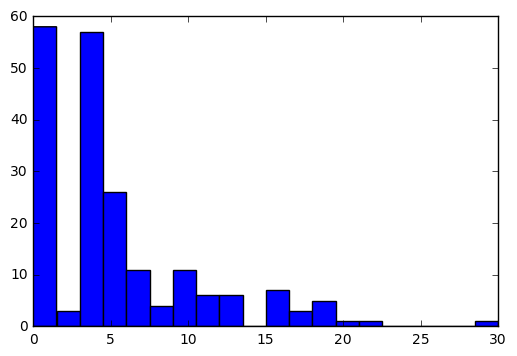

In [81]:
plt.hist(solution_lengths, bins=20)
plt.show()

In [82]:
nocl_solution_lengths = []
for i in student_ids:
    student_solution = sorted_task.loc[sorted_task['student'] == i]
    student_programs = list(student_solution['program'])
    nocl_solution_lengths.append(len(student_programs))

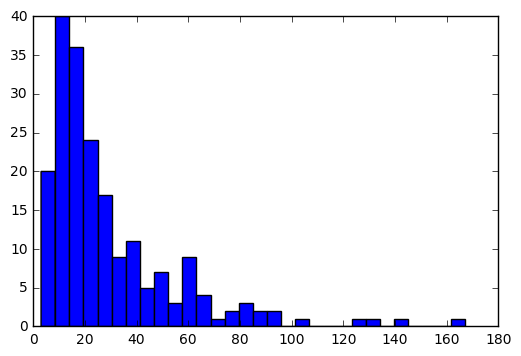

In [83]:
plt.hist(nocl_solution_lengths, bins=30)
plt.show()

In [90]:
def count_student_solutions(student_id, df):
    """
    Returns count of all solutions of given student and of 
    executed solutions
    """
    
    student_data = df.loc[df['student'] == student_id]
    all_count = len(student_data.index)
    correct_exe = student_data.loc[student_data['correct'] == True]
    correct_count = len(correct_exe.index)
    return all_count, correct_count

In [108]:
merged = pd.merge(snapshots, tasks, left_on='task_session', right_on='id')
merged = merged[pd.notnull(merged['program'])]
student_ids = list(set(merged['student']))

In [109]:
lengths = []
for student in student_ids:
    lengths.append(count_student_solutions(student, merged))

In [114]:
over_all_count = 0
correct_count = 0
for all_count, exe_correct_count in lengths:
    over_all_count += all_count
    correct_count += exe_correct_count

In [111]:
over_all_count

122643

In [117]:
correct_count

6565

In [3]:
## student clustering

data = load_dataset('data/')

In [8]:
snapshots = data['program_snapshots']
tasks = data['task_sessions']
merged = pd.merge(snapshots, tasks, left_on='task_session', right_on='id')
merged = merged[pd.notnull(merged['program'])]

In [9]:
merged.head()

id_x  task_session                         time program granularity  order  \
0     1             1  2017-11-10T10:25:16.906946Z       f        edit      1   
1     2             1  2017-11-10T10:25:17.965605Z      ff        edit      2   
2     3             1  2017-11-10T10:25:19.484236Z     fff        edit      3   
3     4             1  2017-11-10T10:25:22.620606Z     fff   execution      1   
4     5             2  2017-11-10T12:19:45.018574Z       f        edit      1   

  correct  time_from_start  time_delta  id_y  student  task  solved  \
0     NaN                8           8     1        5    25    True   
1     NaN                9           1     1        5    25    True   
2     NaN               11           2     1        5    25    True   
3    True               14          14     1        5    25    True   
4     NaN                6           6     2       29    25    True   

                         start                          end  time_spent  
0  2017-11-10T10:25:08.451949Z  2017-11-10T10:25:22.612931Z          14  
1  2017-11-10T10:25:08.451949Z  2017-11-10T10:25:22.612931Z          14  
2  2017-11-10T10:25:08.451949Z  2017-11-10T10:25:22.612931Z          14  
3  2017-11-10T10:25:08.451949Z  2017-11-10T10:25:22.612931Z          14  
4  2017-11-10T12:19:38.296521Z  2017-11-10T12:19:50.945672Z          12

In [11]:
task = merged.loc[merged['task'] == 5]

In [16]:
print("Number of students,", len(list(set(task['student']))))

Number of students, 41


In [17]:
print("Different programs, ", len(list(set(task['program']))))

Different programs,  370


In [18]:
print("Count of rows,", len(task.index))

Count of rows, 927


In [61]:
print("Percent of students solved the task, ", task.loc[task['correct'] == True].size / len(get_students(merged)))

Percent of students solved the task,  0.565008025682


In [62]:

for student in get_students(merged):
        print(merged.loc[merged['student'] == student])

      id_x  task_session                         time program granularity  \
0        1             1  2017-11-10T10:25:16.906946Z       f        edit   
1        2             1  2017-11-10T10:25:17.965605Z      ff        edit   
2        3             1  2017-11-10T10:25:19.484236Z     fff        edit   
3        4             1  2017-11-10T10:25:22.620606Z     fff   execution   
998    999           129  2017-11-17T09:08:36.412314Z       f        edit   
999   1000           129  2017-11-17T09:08:38.153408Z      fr        edit   
1000  1001           129  2017-11-17T09:08:39.049752Z     frl        edit   
1001  1002           129  2017-11-17T09:08:42.141466Z     frl   execution   

      order correct  time_from_start  time_delta  id_y  student  task  solved  \
0         1     NaN                8           8     1        5    25    True   
1         2     NaN                9           1     1        5    25    True   
2         3     NaN               11           2     1        5

KeyboardInterrupt: 

In [50]:
task.loc[task['correct'] == False]

id_x  task_session                         time        program  \
1216      1207           157  2017-11-18T13:43:37.022700Z        W!y{fr}   
1218      1209           157  2017-11-18T13:43:42.456833Z         Wy{fr}   
1219      1210           157  2017-11-18T13:43:44.325189Z         Wy{fr}   
1226      1217           157  2017-11-18T13:44:20.478675Z   Wy{fr}I!y{l}   
7672      7673           645  2017-11-27T16:41:37.512411Z           I{f}   
7683      7684           645  2017-11-27T16:42:04.823947Z     W{s}R10{s}   
7687      7688           645  2017-11-27T16:42:22.872776Z         R10{s}   
7689      7690           645  2017-11-27T16:42:38.587079Z        R10{s}f   
15090    15091          1244  2017-12-13T19:04:15.254138Z   R2{rfl}W!y{}   
15091    15092          1244  2017-12-13T19:04:19.170771Z   R2{rfl}W!y{}   
15106    15107          1244  2017-12-13T19:05:38.193760Z    Wy{f}W!y{f}   
15674    15675          1298  2017-12-15T15:52:12.480682Z         W!b{f}   
15682    15689          1298  2017-12-15T16:00:36.312762Z       R3{frfl}   
15683    15716          1298  2017-12-15T16:03:51.519370Z       R3{frfl}   
15705    15765          1298  2017-12-15T16:06:44.470869Z  W!b{I!y{rl}f}   
15707    15769          1298  2017-12-15T16:07:02.271691Z   W!b{Iy{rl}f}   
15709    15771          1298  2017-12-15T16:07:11.115638Z    Wb{Iy{rl}f}   
15710    15772          1298  2017-12-15T16:07:12.903711Z    Wb{Iy{rl}f}   
15713    15778          1298  2017-12-15T16:07:28.525872Z    W!b{Iy{r}f}   
15717    15783          1298  2017-12-15T16:07:41.412222Z   W!b{Iy{r}lf}   
15722    15793          1298  2017-12-15T16:07:54.422585Z   W!b{Iy{r}fl}   
15727    15801          1298  2017-12-15T16:08:31.613085Z   W!b{fIy{r}l}   
16307    16153          1323  2017-12-15T19:19:23.860225Z         W!y{s}   
18463    18464          1470  2017-12-17T14:36:41.144746Z    W!b{f}I{rl}   
18464    18465          1470  2017-12-17T14:36:45.086603Z    W!b{f}I{rl}   
18466    18467          1470  2017-12-17T14:37:09.994061Z  W!b{f}I!y{rl}   
18469    18470          1470  2017-12-17T14:38:28.135574Z  W!b{fI!y{rl}}   
18470    18471          1470  2017-12-17T14:38:39.137326Z  W!b{fI!y{rl}}   
19515    19516          1552  2017-12-19T11:31:59.558520Z    fIy{r}R2{l}   
19519    19520          1552  2017-12-19T11:32:26.421651Z       fIy{r}lr   
...        ...           ...                          ...            ...   
106864  107045          7117  2018-01-30T10:24:48.763639Z    R3{fIy{r}l}   
106896  107300          7117  2018-01-30T10:26:38.237164Z   W!y{f}Iy{rl}   
106901  107384          7117  2018-01-30T10:27:12.779850Z   W!y{f}Iy{rl}   
106902  107399          7117  2018-01-30T10:27:17.438143Z   W!y{f}Iy{rl}   
106903  107412          7117  2018-01-30T10:27:25.754458Z   W!y{f}Iy{rl}   
106908  107455          7117  2018-01-30T10:27:45.491707Z   W!y{f}Iy{rl}   
106909  107481          7117  2018-01-30T10:27:59.288084Z   W!y{f}Iy{rl}   
106913  107543          7117  2018-01-30T10:28:40.034042Z    R3{fIy{rl}}   
106914  107591          7117  2018-01-30T10:29:09.033135Z    R3{fIy{rl}}   
106916  107632          7117  2018-01-30T10:29:30.928662Z    R4{fIy{rl}}   
106918  107669          7117  2018-01-30T10:29:57.723890Z    R8{fIy{rl}}   
106920  107695          7117  2018-01-30T10:30:28.111090Z    R6{fIy{rl}}   
107047  106839          7127  2018-01-30T10:23:40.457445Z       fI!y{rl}   
107061  107029          7127  2018-01-30T10:24:43.655550Z   I!y{R2{rl}f}   
107081  107284          7127  2018-01-30T10:26:27.352318Z   I!b{R2{rfl}}   
107089  107344          7127  2018-01-30T10:27:01.714159Z  I!b{W!y{rfl}}   
107096  107396          7127  2018-01-30T10:27:17.093896Z  I!b{W!y{frl}}   
107098  107418          7127  2018-01-30T10:27:29.254800Z   I!b{Wy{frl}}   
107101  107447          7127  2018-01-30T10:27:41.805171Z  I!b{W!r{frl}}   
107104  107483          7127  2018-01-30T10:28:00.104421Z   I!b{Wk{frl}}   
107105  107556          7127  2018-01-30T10:28:47.437977Z 

In [56]:

task.loc[task['granularity'] == 'execution']

AttributeError: 'DataFrameGroupBy' object has no attribute 'show'

In [28]:
dict_task = dict(merged.groupby(by='task').size())

In [35]:
zip_task = []
for key, val in dict_task.items():
    zip_task.append((key, val))

In [37]:
zip_task.sort(key=lambda x: x[1], reverse=True)

In [40]:
zip_task = [(get_task_name(key, data), count) for key, count in zip_task]

In [41]:
zip_task

[('tunnel', 7199),
 ('2diamonds-2meteorids', 6822),
 ('dont-forget-shot', 5925),
 ('clean-your-path', 4190),
 ('last-shot', 3698),
 ('stairs', 3312),
 ('surrounded-diamond', 2990),
 ('belgian-flag', 2873),
 ('steal-the-nose', 2848),
 ('direction-change', 2730),
 ('yellow-is-not-red', 2577),
 ('double-track', 2520),
 ('beware-of-asteroid', 2444),
 ('diamond-on-right', 2408),
 ('n', 2383),
 ('arrow', 2278),
 ('yellow-hint', 2153),
 ('find-the-path', 2136),
 (None, 2123),
 ('turning-left-and-right', 2074),
 ('shooting', 2030),
 ('plus', 1955),
 ('rectangle', 1878),
 ('diamonds-in-meteoroid-cloud', 1833),
 ('wormhole-demo', 1772),
 ('triangle', 1772),
 ('red-shooting', 1728),
 ('blocked-wormhole', 1716),
 ('zig-zag-plus', 1692),
 ('ladder', 1602),
 ('diamond-in-house', 1602),
 ('two-diamonds', 1542),
 ('turning-left', 1529),
 ('stop-on-red', 1475),
 ('turning-right', 1454),
 ('zig-zag', 1388),
 ('turning-right-and-left', 1352),
 ('big-left-turn', 1340),
 ('big-right-turn', 1324),
 ('big-sl